In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated,Literal


In [2]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int

    equation:str
    discrimant:float
    result:str

In [3]:

def show_equation(state:QuadState):
    equation=f'{state["a"]}*2{state["b"]}*{state["c"]}'
    return {"equation":equation}

def calc_discrimant(state:QuadState):
    discrimant=state["b"]**2-(4*state["a"]*state["c"])
    return {"discrimant":discrimant}

def real_roots(state:QuadState):
    a = state["a"]
    b = state["b"]
    d = state["discrimant"]

    root1 = (-b+d**0.5)/(2*a)
    root2 = (-b-d**0.5)/(2*a)
    result = f'The real roots are {root1} and  {root2}'
    return {"result":result}

def repeated_roots(state:QuadState):
    a = state["a"]
    b = state["b"]
    root = (-b)/(2*a)
    result = f'Repeated root is there which is {root}'
    return {"result":result}

def no_real_roots(state:QuadState):

    result = f'No real roots'
    return {"result":result}

def check_condition(state:QuadState)->Literal["real_roots","repeated_roots","no_real_roots"]:
    d = state["discrimant"]
    if d>0:
        return "real_roots"
    elif d==0:
        return "repeated_roots"
    else:
        return "no_real_roots"

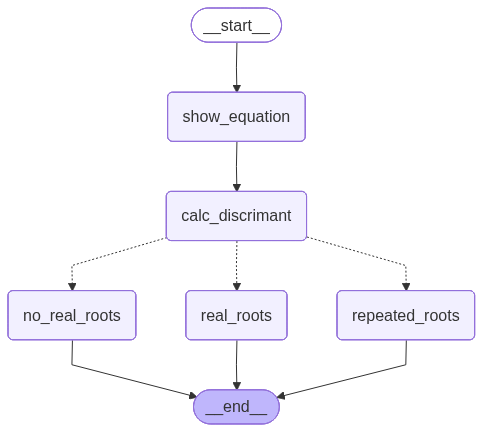

In [6]:
graph=StateGraph(QuadState)
graph.add_node("show_equation",show_equation)
graph.add_node("calc_discrimant",calc_discrimant)
graph.add_node("real_roots",real_roots)
graph.add_node("repeated_roots",repeated_roots)
graph.add_node("no_real_roots",no_real_roots)


graph.add_edge(START,"show_equation")
graph.add_edge("show_equation","calc_discrimant")
graph.add_conditional_edges("calc_discrimant",check_condition)
graph.add_edge("real_roots",END)
graph.add_edge("repeated_roots",END)
graph.add_edge("no_real_roots",END)



workflow=graph.compile()
workflow

In [7]:
initial_state={"a":4,"b":-5,"c":-4}
workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4*2-5*-4',
 'discrimant': 89,
 'result': 'The real roots are 1.8042476415070754 and  -0.5542476415070754'}